In [1]:
# !pip install --upgrade mplfinance

# Importing libraries

In [2]:
# Basic libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore") 

# For processing
import math
import random
import datetime as dt
import matplotlib.dates as mdates

# For visualization
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc

# Libraries for model training
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error

In [3]:
# Reading our dataset
df = pd.read_csv('dataset/preprocessed_CAC40.csv', parse_dates=['Date'])
df.head()

,Unnamed: 0,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume
0,0,Accor,2020-04-03,22.99,23.40,23.40,22.99,67
1,1,Accor,2020-04-02,23.91,22.99,23.91,22.99,250
2,2,Accor,2020-04-01,24.10,23.83,24.10,23.83,37
3,3,Accor,2020-03-31,25.04,25.00,25.24,24.99,336
4,4,Accor,2020-03-30,26.50,25.02,26.50,24.99,415


In [4]:
df

,Unnamed: 0,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume
0,0,Accor,2020-04-03,22.99,23.40,23.40,22.99,67
1,1,Accor,2020-04-02,23.91,22.99,23.91,22.99,250
2,2,Accor,2020-04-01,24.10,23.83,24.10,23.83,37
3,3,Accor,2020-03-31,25.04,25.00,25.24,24.99,336
4,4,Accor,2020-03-30,26.50,25.02,26.50,24.99,415
...,...,...,...,...,...,...,...,...
97643,97643,Worldline SA,2014-07-04,16.22,16.28,16.29,16.22,NaN
97644,97644,Worldline SA,2014-07-03,16.12,16.28,16.28,16.12,NaN
97645,97645,Worldline SA,2014-07-02,16.22,16.17,16.32,16.17,NaN
97646,97646,Worldline SA,2014-07-01,16.42,16.25,16.55,16.25,NaN


# Explorartory Data Analysis

## Preprocessing

In [5]:
# Dropping unnecessary column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
# Defining a function that will contain stocks data for a specific company
def specific_data(company, start, end):
    company_data = df[df['Name'] == company]
    date_filtered_data = company_data[(company_data['Date'] > start) & (company_data['Date'] < end)]
    return date_filtered_data

In [7]:
# Selecting any random company out of our 'Name' column
# company_name = random.choice(df['Name'].unique().tolist())
company_name = "Accor"

# Setting the start and end date
start_date=dt.datetime(2014,1,1)
end_date=dt.datetime(2020,1,1)

# Calling our function
specific_df = specific_data(company_name, start_date, end_date)

In [8]:
specific_df

,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume
67,Accor,2019-12-30,42.10,42.10,42.10,42.10,NaN
68,Accor,2019-12-27,41.92,42.20,42.20,41.92,135
69,Accor,2019-12-23,41.08,42.09,42.09,41.08,10
70,Accor,2019-12-20,41.26,41.26,41.26,41.26,NaN
71,Accor,2019-12-19,41.31,41.31,41.31,41.31,NaN
...,...,...,...,...,...,...,...
1576,Accor,2014-01-08,32.47,32.47,32.47,32.47,NaN
1577,Accor,2014-01-07,32.21,32.21,32.21,32.21,NaN
1578,Accor,2014-01-06,32.27,32.27,32.27,32.27,NaN
1579,Accor,2014-01-03,31.97,31.97,31.97,31.97,NaN


In [9]:
specific_df.head()

,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume
67,Accor,2019-12-30,42.10,42.10,42.10,42.10,NaN
68,Accor,2019-12-27,41.92,42.20,42.20,41.92,135
69,Accor,2019-12-23,41.08,42.09,42.09,41.08,10
70,Accor,2019-12-20,41.26,41.26,41.26,41.26,NaN
71,Accor,2019-12-19,41.31,41.31,41.31,41.31,NaN


## Visualization

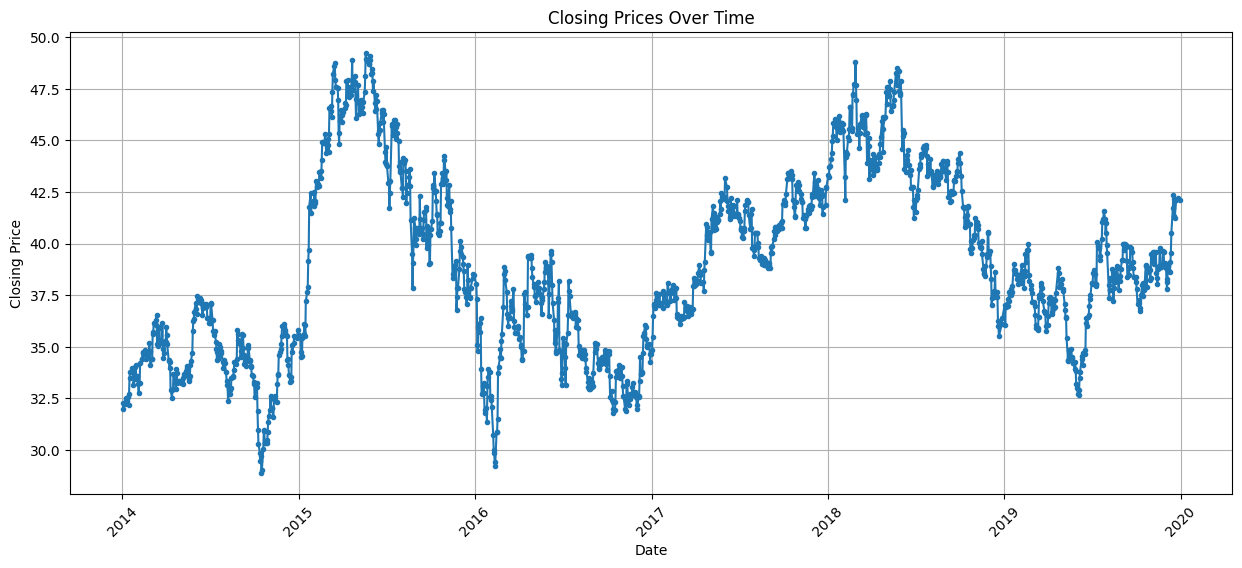

In [10]:
# Line Chart of Closing Prices Over Time

# Convert 'Date' column to datetime
specific_df['Date'] = pd.to_datetime(specific_df['Date'])

plt.figure(figsize=(15, 6))
plt.plot(specific_df['Date'], specific_df['Closing_Price'], marker='.')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

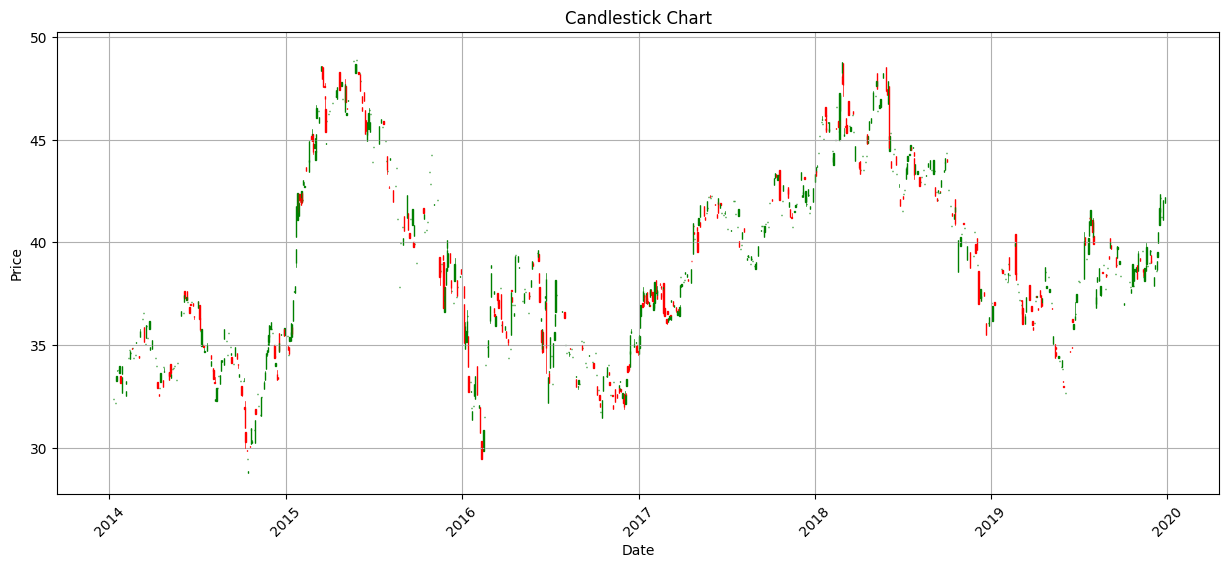

In [11]:
# Candlestick Chart

# Convert 'Date' column to matplotlib date format
matplotlib_date = mdates.date2num(specific_df['Date'])

# Create an array of tuples in the required format
ohlc = np.vstack((matplotlib_date, specific_df['Open'], specific_df['Daily_High'], specific_df['Daily_Low'], specific_df['Closing_Price'])).T

plt.figure(figsize=(15, 6))
ax = plt.subplot()
candlestick_ohlc(ax, ohlc, width=0.6, colorup='g', colordown='r')
ax.xaxis_date()
plt.title('Candlestick Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

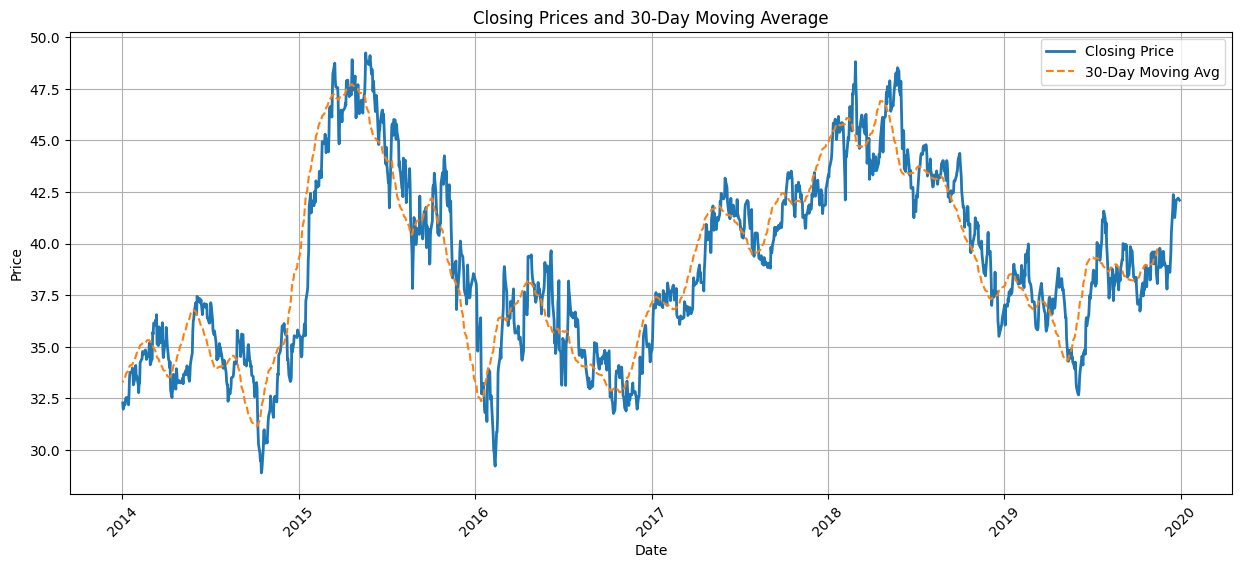

In [12]:
# Closing Prices and Moving Average plot

window = 30
plt.figure(figsize=(15, 6))
plt.plot(specific_df['Date'], specific_df['Closing_Price'], label='Closing Price', linewidth=2)
plt.plot(specific_df['Date'], specific_df['Closing_Price'].rolling(window=window).mean(), label=f'{window}-Day Moving Avg', linestyle='--')
plt.title(f'Closing Prices and {window}-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

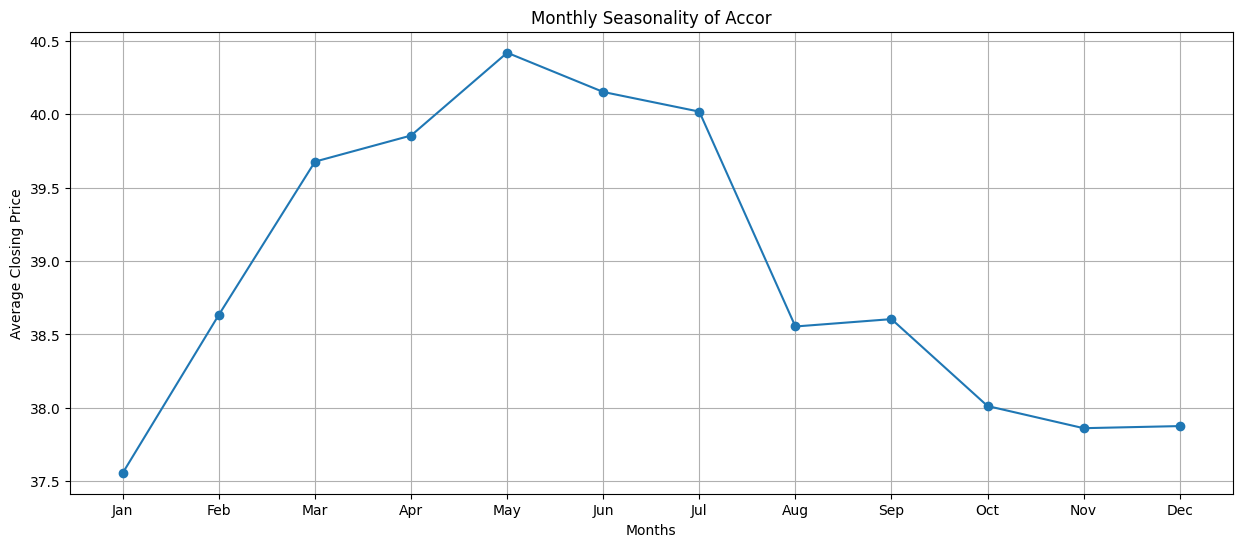

In [13]:
# Monthly Seasonality of Closing Prices
specific_df['Month'] = specific_df['Date'].dt.month

monthly_average = specific_df.groupby('Month')['Closing_Price'].mean()

plt.figure(figsize=(15, 6))
plt.plot(monthly_average.index, monthly_average.values, marker='o')
plt.title(f'Monthly Seasonality of {company_name}')
plt.xlabel('Months')
plt.ylabel('Average Closing Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

In [14]:
specific_df.head()

,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume,Month
67,Accor,2019-12-30,42.10,42.10,42.10,42.10,NaN,12
68,Accor,2019-12-27,41.92,42.20,42.20,41.92,135,12
69,Accor,2019-12-23,41.08,42.09,42.09,41.08,10,12
70,Accor,2019-12-20,41.26,41.26,41.26,41.26,NaN,12
71,Accor,2019-12-19,41.31,41.31,41.31,41.31,NaN,12


In [15]:
new_df = specific_df.reset_index()['Closing_Price']

In [16]:
# Normalizing our data using MinMaxScaler
scaler = MinMaxScaler()
scaled_data=scaler.fit_transform(np.array(new_df).reshape(-1,1))

In [31]:
# Split into training and testing sets
train_size = int(len(scaled_data) * 0.8)  # 80% for training
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [32]:
# Define the sequence length (number of past time steps)
n_past = 60

# Prepare sequences for LSTM
X_train, y_train = [], []
for i in range(n_past, len(train_data)):
    X_train.append(train_data[i - n_past:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Similarly prepare sequences for the test set
X_test, y_test = [], []
for i in range(n_past, len(test_data)):
    X_test.append(test_data[i - n_past:i, 0])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [33]:
print("Training set size:-")
print(X_train.shape), print(y_train.shape)
print("\n")
print("Testing set size:-")
print(X_test.shape), print(y_test.shape)

Training set size:-
(1151, 60)
(1151,)


Testing set size:-
(243, 60)
(243,)


(None, None)

In [34]:
# Reshape input data 
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Random Forest

In [25]:
# Import Random Forest
from sklearn.ensemble import RandomForestRegressor

# Reshape data back to 2D for Random Forest
X_train_rf = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test_rf = X_test.reshape(X_test.shape[0], X_test.shape[1])

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train)

# Make predictions
train_predict = rf_model.predict(X_train_rf)
test_predict = rf_model.predict(X_test_rf)

# Reshape predictions for inverse scaling
train_predict = train_predict.reshape(-1, 1)
test_predict = test_predict.reshape(-1, 1)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Inverse transform y_test
y_test_scale = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

mae = mean_absolute_error(y_test_scale, test_predict)
mse = mean_squared_error(y_test_scale, test_predict)
rmse = math.sqrt(mse)
r2 = r2_score(y_test_scale, test_predict)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 0.6082
Mean Squared Error (MSE): 0.7631
Root Mean Squared Error (RMSE): 0.8736
R² Score: 0.7393


## XGB

In [26]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

# Reshape data for XGBoost (it expects 2D input)
X_train_xgb = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test_xgb = X_test.reshape(X_test.shape[0], X_test.shape[1])

# Initialize the XGBRegressor model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train_xgb, y_train)

# Make predictions
train_predict = xgb_model.predict(X_train_xgb)
test_predict = xgb_model.predict(X_test_xgb)

# Reshape for inverse scaling
train_predict = train_predict.reshape(-1, 1)
test_predict = test_predict.reshape(-1, 1)

# Inverse transform to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_test_scale = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

mae = mean_absolute_error(y_test_scale, test_predict)
mse = mean_squared_error(y_test_scale, test_predict)
rmse = math.sqrt(mse)
r2 = r2_score(y_test_scale, test_predict)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 0.4558
Mean Squared Error (MSE): 0.3758
Root Mean Squared Error (RMSE): 0.6130
R² Score: 0.8716


## Decision Tree

In [28]:
# Import Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Reshape data for Decision Tree (2D input required)
X_train_dt = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test_dt = X_test.reshape(X_test.shape[0], X_test.shape[1])

# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_dt, y_train)

# Make predictions
train_predict = dt_model.predict(X_train_dt)
test_predict = dt_model.predict(X_test_dt)

# Reshape predictions for inverse scaling
train_predict = train_predict.reshape(-1, 1)
test_predict = test_predict.reshape(-1, 1)

# Inverse transform predictions and actual values
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_test_scale = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

mae = mean_absolute_error(y_test_scale, test_predict)
mse = mean_squared_error(y_test_scale, test_predict)
rmse = math.sqrt(mse)
r2 = r2_score(y_test_scale, test_predict)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 0.8998
Mean Squared Error (MSE): 1.5019
Root Mean Squared Error (RMSE): 1.2255
R² Score: 0.4869
